In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, LeaveOneOut
from sklearn.ensemble import RandomForestRegressor 

# Data inglobation from HGD mutation database
[link](https://hgddatabase.cvtisr.sk/files/Predicted%20Structural%20Effect%20of%20the%20HGD%20gene%20Missense%20Variants_139M_new.pdf) of the dataset.

In [2]:
df = pd.read_csv('../datasets/df_with_scores.csv')

In [3]:
new_features = pd.read_csv('../datasets/hgddatabase_scores.csv')

In [4]:
new_features.head()

,Variant,Protein Variant,Exon,Variant Class,Destabilise Monomer?,Destabilise Hexamer?,Comments,Dist. to Interface,Dist. to Fe(within protomer),Dist. to Fe(neighbouring protomer),Dist. to Substrate(within protomer),mCSM (ΔΔG Kcal/mol),protomer_DUET(ΔΔG Kcal/mol),mCSM-PPI (ΔΔG Kcal/mol)
0,G123A,p.(Gly123Ala),6.0,Protomer destabilisation; Hexamer disruption,No,Mildly,Positive phi glycine,5.194,20.542,25.832,20.602,-0.227,0.082,-0.408
1,G270R,p.(Gly270Arg),11.0,Protomer destabilisation; Hexamer disruption,Yes,Yes,NaN,6.109,36.522,17.370,34.754,-1.094,-0.838,-2.435
2,R225P,p.(Arg225Pro),10.0,Hexamer disruption,No,Yes,NaN,3.004,28.991,19.555,26.111,0.253,0.289,-2.216
3,G170A,p.(Gly170Ala),8.0,Protomer destabilisation; Hexamer disruption,Yes,Yes,Positive phi glycine,11.034,36.343,22.777,33.916,-0.757,-0.484,-1.004
4,G205D,p.(Gly205Asp),9.0,Protomer destabilisation,Yes,No,NaN,5.894,25.554,17.104,25.457,-1.405,-1.550,-0.141


In [18]:
new_features.drop(columns=['Variant Class','Comments'], inplace=True)

In [19]:
new_features.dropna(inplace=True)

In [20]:
df = df.join(new_features.set_index('Variant'), on='Protein change allele 1 ', rsuffix='_1')

In [21]:
df = df.join(new_features.set_index('Variant'), on='Protein change allele 2', rsuffix='_2')

In [22]:
df.head()

,Protein change allele 1,Protein change allele 2,structure_allele1,structure_allele2,pdb_file_allele1,pdb_file_allele2,patient,sex,birth,bmi,...,Exon_2,Destabilise Monomer?_2,Destabilise Hexamer?_2,Dist. to Interface_2,Dist. to Fe(within protomer)_2,Dist. to Fe(neighbouring protomer)_2,Dist. to Substrate(within protomer)_2,mCSM (ΔΔG Kcal/mol)_2,protomer_DUET(ΔΔG Kcal/mol)_2,mCSM-PPI (ΔΔG Kcal/mol)_2
0,G161R,His371Profs,<Structure id=G161R>,<Structure id=His371Profs>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/H371fs_9b3dd/H371fs...,101A,F,1963.0,27.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,102A,F,1964.0,24.47,...,8.0,Yes,Yes,20.324,27.695,36.401,23.795,-1.273,-1.325,-1.230
2,G161R,M368V,<Structure id=G161R>,<Structure id=M368V>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,105A,F,1958.0,33.98,...,13.0,No,Yes,3.259,9.001,33.799,9.163,-0.510,-0.267,-1.253
3,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,107A,F,1952.0,26.29,...,8.0,Yes,Yes,20.324,27.695,36.401,23.795,-1.273,-1.325,-1.230
4,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,108A,F,1956.0,27.18,...,8.0,Yes,Yes,20.324,27.695,36.401,23.795,-1.273,-1.325,-1.230


In [23]:
# Some patients (like the first) have one frameshift on an allele. since we have dtaa only for MISSENSE mutations we drop these cases
df.dropna(inplace=True)

In [24]:
df.columns

Index(['Protein change allele 1 ', 'Protein change allele 2',
       'structure_allele1', 'structure_allele2', 'pdb_file_allele1',
       'pdb_file_allele2', 'patient', 'sex', 'birth', 'bmi',
       'physical_health_score', 'mental_health_score', 'AKUSSI_jointpain',
       'AKUSSI_spinalpain', 'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living',
       'KOOSsport', 'KOOS_QOL', 'HAQ_hapVAS', 'HAQ_haqDI', 'RMSD_A1',
       'RMSD_all_A1', 'Alignment_A1', 'RMSD_A2', 'RMSD_all_A2', 'Alignment_A2',
       'Protein Variant', 'Exon', 'Destabilise Monomer?',
       'Destabilise Hexamer?', 'Dist. to Interface',
       'Dist. to Fe(within protomer)', 'Dist. to Fe(neighbouring protomer)',
       'Dist. to Substrate(within protomer)', 'mCSM (ΔΔG Kcal/mol)',
       'protomer_DUET(ΔΔG Kcal/mol)', 'mCSM-PPI (ΔΔG Kcal/mol)',
       'Protein Variant_2', 'Exon_2', 'Destabilise Monomer?_2',
       'Destabilise Hexamer?_2', 'Dist. to Interface_2',
       'Dist. to Fe(within protomer)_2',
       'Dist. to Fe(nei

In [25]:
for col in ['Destabilise Monomer?','Destabilise Hexamer?','Destabilise Monomer?_2','Destabilise Hexamer?_2']:
    for i in df.index:
        if df[col][i]=='No':
            df[col][i]=0
        elif df[col][i]=='Yes':
            df[col][i]=1
        elif df[col][i]=='Mildly':
            df[col][i]=0.5

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_24968\3288378547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=1
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_24968\3288378547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=0
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_24968\3288378547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=0.5


In [26]:
#TODO: serve davvero?
cols=['Exon','Dist. to Interface','Dist. to Fe(within protomer)',
      'Dist. to Fe(neighbouring protomer)','Dist. to Substrate(within protomer)','mCSM (ΔΔG Kcal/mol)','protomer_DUET(ΔΔG Kcal/mol)',
      'Exon_2','Dist. to Interface_2','Dist. to Fe(within protomer)_2',
      'Dist. to Fe(neighbouring protomer)_2','Dist. to Substrate(within protomer)_2','mCSM (ΔΔG Kcal/mol)_2','protomer_DUET(ΔΔG Kcal/mol)_2',
      'Destabilise Monomer?','Destabilise Hexamer?','Destabilise Monomer?_2','Destabilise Hexamer?_2']

df[cols]=df[cols].apply(pd.to_numeric)

# Correlation

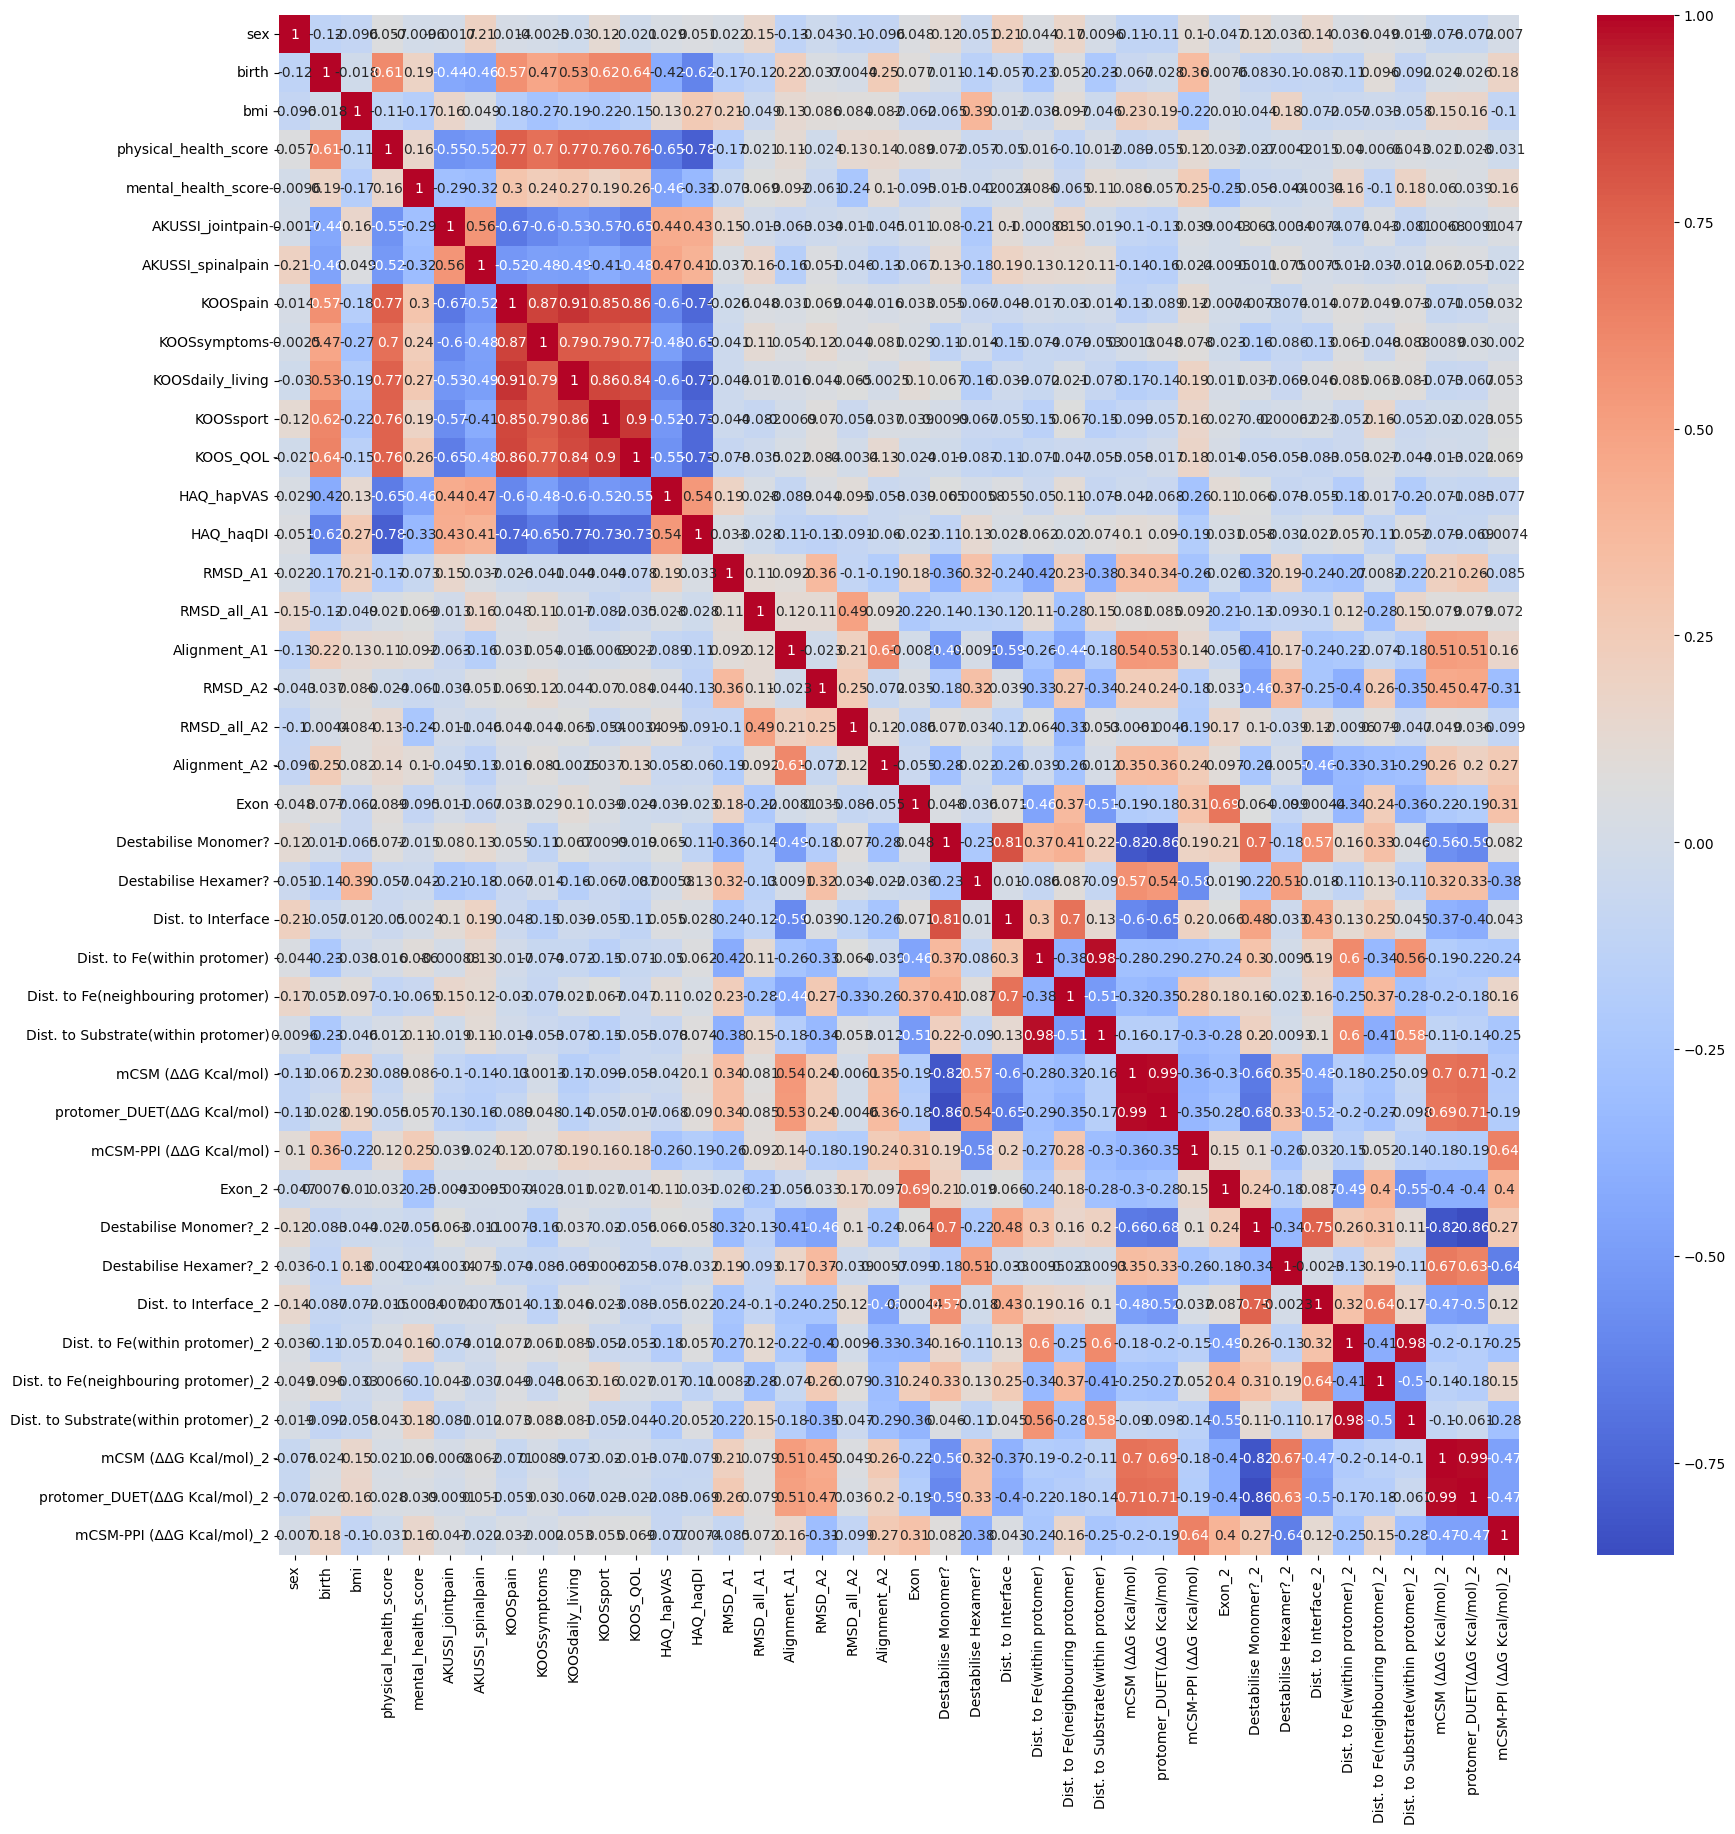

In [30]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Strong negative correlation between mCSM, protomer_DUET and 'destabilise monomer?'

# Classification

In [27]:
df['sex'].value_counts()

M    47
F    28
Name: sex, dtype: int64

In [28]:
# make M -1 and F 1
df['sex'].replace({'M': -1, 'F': 1}, inplace=True)

In [29]:
'''labels = df[['Protein change allele 1 ', 'Protein change allele 2',
           'physical_health_score', 
           'mental_health_score', 
           'AKUSSI_jointpain', 'AKUSSI_spinalpain', 
           'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living', 'KOOSsport', 'KOOS_QOL', 
           'HAQ_hapVAS', 'HAQ_haqDI'
           ]]'''

labels_cols = ['Protein change allele 1 ', 'Protein change allele 2',
              'physical_health_score', 
              'mental_health_score', 
              'AKUSSI_jointpain', 'AKUSSI_spinalpain', 
              'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living', 'KOOSsport', 'KOOS_QOL', 
              'HAQ_hapVAS', 'HAQ_haqDI'
              ]

In [31]:
len(df)

75

In [19]:
df_g161r = df[(df['Protein change allele 1 ']=='G161R') & (df['Protein change allele 2']=='G161R')]
len(df_g161r)

13

In [20]:
# see value_counts() for the pair ('Protein change allele 1 ', 'Protein change allele 2')
pair = df['Protein change allele 1 '].str.cat(df['Protein change allele 2'], sep=' - ')
pair.value_counts()

G161R - G161R    13
A122V - A122V    10
M368V - M368V     5
R53Q - R53Q       4
G161R - V300G     3
E401Q - E401Q     2
I216T - G360R     2
P230S - P230S     2
P230S - V300G     2
G161R - M368V     2
M368V - P230S     2
G123A - G123A     2
E168K - E168K     2
G161R - R53Q      2
G161R - G152R     1
F73L - G360R      1
G170A - I216T     1
G161R - G270R     1
G185R - P230S     1
G361R - P332R     1
W97G - P230S      1
G161R - T167I     1
S47L - S47L       1
W97C - W97C       1
G161R - F227S     1
C120F - C120F     1
G161R - I346T     1
S150L - G161R     1
G161R - E178G     1
G360A - A122V     1
R225P - I216T     1
L116P - L116P     1
A267V - A267V     1
I346T - G161R     1
G362E - M368V     1
E178G - G161R     1
Name: Protein change allele 1 , dtype: int64

In [21]:
X = df.drop(columns = labels_cols)
X = X.drop(columns = ['structure_allele1', 
                      'structure_allele2', 
                      'pdb_file_allele1', 
                      'pdb_file_allele2', 
                      'patient',
                      'Protein Variant',
                      'Protein Variant_2'
                      ])

In [22]:
X_g161r = df_g161r.drop(columns = labels_cols)
X_g161r = X_g161r.drop(columns = ['structure_allele1', 
                        'structure_allele2', 
                        'pdb_file_allele1', 
                        'pdb_file_allele2', 
                        'patient',
                        'Protein Variant',
                        'Protein Variant_2'
                        ])

In [23]:
X.dtypes

sex                                        int64
birth                                    float64
bmi                                      float64
RMSD_A1                                  float64
RMSD_all_A1                              float64
Alignment_A1                             float64
RMSD_A2                                  float64
RMSD_all_A2                              float64
Alignment_A2                             float64
Exon                                     float64
Destabilise Monomer?                     float64
Destabilise Hexamer?                     float64
Dist. to Interface                       float64
Dist. to Fe(within protomer)             float64
Dist. to Fe(neighbouring protomer)       float64
Dist. to Substrate(within protomer)      float64
mCSM (ΔΔG Kcal/mol)                      float64
protomer_DUET(ΔΔG Kcal/mol)              float64
mCSM-PPI (ΔΔG Kcal/mol)                  float64
Exon_2                                   float64
Destabilise Monomer?

#### Target 

In [24]:
y = df['physical_health_score']

In [25]:
y_g161r = df_g161r['physical_health_score']

In [26]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_g161r = scaler.transform(X_g161r)

In [28]:
k_fold = KFold(n_splits = 5)

parameters = {'n_estimators': [100, 200, 300], 'max_depth': [30, 40, 50], 'criterion' : ['squared_error'] }

grid = GridSearchCV(
    estimator=RandomForestRegressor(), 
    param_grid = parameters, 
    cv = k_fold, 
    verbose = 10, 
    scoring = 'neg_mean_squared_error')

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START criterion=squared_error, max_depth=30, n_estimators=100.....
[CV 1/5; 1/9] END criterion=squared_error, max_depth=30, n_estimators=100;, score=-38.575 total time=   0.2s
[CV 2/5; 1/9] START criterion=squared_error, max_depth=30, n_estimators=100.....
[CV 2/5; 1/9] END criterion=squared_error, max_depth=30, n_estimators=100;, score=-66.314 total time=   0.1s
[CV 3/5; 1/9] START criterion=squared_error, max_depth=30, n_estimators=100.....
[CV 3/5; 1/9] END criterion=squared_error, max_depth=30, n_estimators=100;, score=-70.606 total time=   0.1s
[CV 4/5; 1/9] START criterion=squared_error, max_depth=30, n_estimators=100.....
[CV 4/5; 1/9] END criterion=squared_error, max_depth=30, n_estimators=100;, score=-106.268 total time=   0.1s
[CV 5/5; 1/9] START criterion=squared_error, max_depth=30, n_estimators=100.....
[CV 5/5; 1/9] END criterion=squared_error, max_depth=30, n_estimators=100;, score=-47.088 total ti

In [29]:
# number of estimator and depth of best model
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
# fit the best model on the training data
best_model.fit(X_train, y_train)

# test the model
y_pred = best_model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 103.08422608695652, MAE: 8.68782608695652, R2: 0.19190961145194274


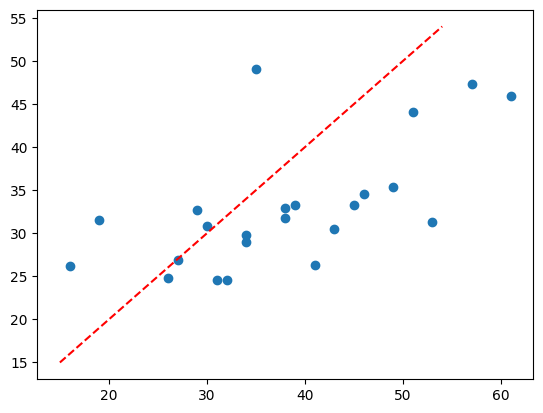

In [32]:
plt.scatter(y_test, y_pred)
# plot the line of best fit
plt.plot(np.arange(15, 55), np.arange(15, 55), color='red', linestyle='--')

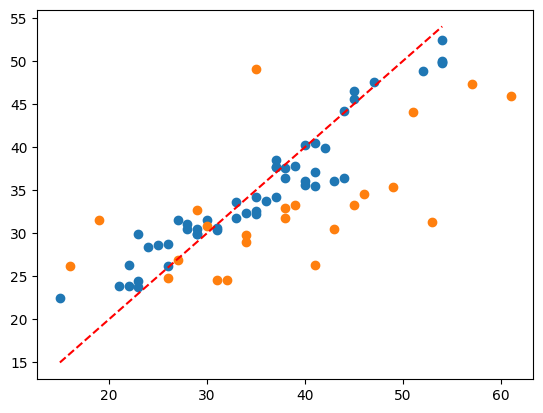

In [33]:
# see for train
y_pred_train = best_model.predict(X_train)
plt.scatter(y_train, y_pred_train)
plt.scatter(y_test, y_pred)
plt.plot(np.arange(15, 55), np.arange(15, 55), color='red', linestyle='--')
plt.show()

In [34]:
### define X_train_g161r as the intersection of X_train and X_g161r
X_train.shape, X_g161r.shape

((52, 29), (13, 29))

In [35]:
X_train.shape

(52, 29)

In [36]:
X_g161r.shape

(13, 29)

In [37]:
len(X_g161r)

13

In [38]:
np.sum(np.abs(X_train[1] - X_g161r[1]))

5.643654631973303

In [39]:
for i in range(len(X_train)):
    for j in range(len(X_g161r)):
        if np.sum(np.abs(X_train[i] - X_g161r[j])) < 1e-10:
            print(i,' ',j)

6   8
9   6
15   2
29   7
45   1
50   5


In [40]:
X_train_g161r=X_train[[6,9,15,29,45,50]]

In [41]:
X_train_g161r.shape

(6, 29)

In [42]:
for i in range(len(X_test)):
    for j in range(len(X_g161r)):
        if np.sum(np.abs(X_test[i] - X_g161r[j])) < 1e-10:
            print(i,' ',j)

1   10
3   0
9   11
12   9
14   4
16   3
19   12


In [43]:
X_test_g161r=X_test[[1,3,9,12,14,16,19]]

In [44]:
X_test_g161r.shape

(7, 29)

In [45]:
y_g161r

1     53.0
3     23.0
4     26.0
6     41.0
13    16.0
23    38.0
28    54.0
43    31.0
48    21.0
72    32.0
90    43.0
91    31.0
93    26.0
Name: physical_health_score, dtype: float64

In [46]:
y_g161r[[1,3]]

1    53.0
3    23.0
Name: physical_health_score, dtype: float64

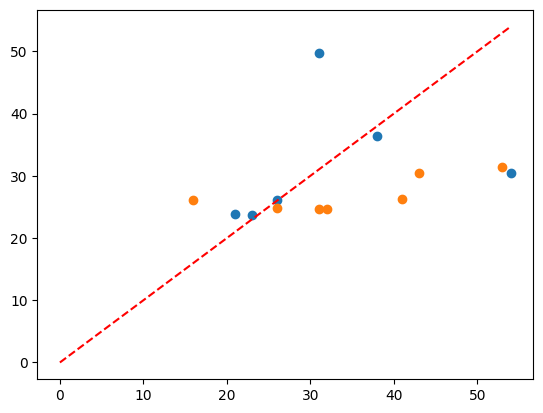

In [47]:
y_pred_train_g161r = best_model.predict(X_train_g161r)
y_train_g161r=y_g161r[y_g161r.index[[8,7,2,6,1,5]]]

y_test_g161r=y_g161r[y_g161r.index[[10,0,11,9,4,3,12]]]
y_pred_test_g161r = best_model.predict(X_test_g161r)
plt.scatter(y_train_g161r,y_pred_train_g161r)
plt.scatter(y_test_g161r, y_pred_test_g161r)
plt.plot(np.arange(0, 55), np.arange(0, 55), color='red', linestyle='--')
plt.show()

## Leave one out

In [48]:
# leave one out cross validation

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV, LeaveOneOut

k_fold = LeaveOneOut()
k_fold.get_n_splits(X_train, y_train)

exponents = np.arange(-15, -1)
parameters = {'alpha': 10.0**exponents}

grid = GridSearchCV(
    estimator = Ridge(), 
    param_grid = parameters, 
    cv = k_fold, 
    scoring = 'neg_mean_squared_error'
    )

In [49]:
# fit the model
grid.fit(X_train, y_train)

c:\Users\Giamm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.94644e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Giamm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.62068e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Giamm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.29297e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Giamm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.76354e-18): result may not be accurate.
  return linalg.solve

GridSearchCV(cv=LeaveOneOut(), estimator=Ridge(),
             param_grid={'alpha': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02])},
             scoring='neg_mean_squared_error')

In [50]:
# get the best model
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [51]:
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 174.69044721582134, MAE: 10.117185050627391, R2: -0.36942068369594105


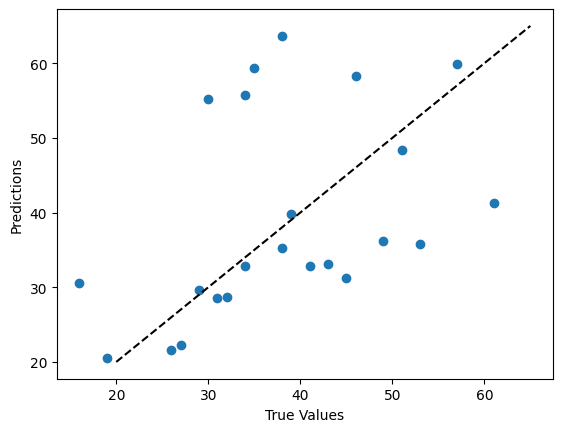

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(np.linspace(20, 65), np.linspace(20, 65), color='black', linestyle='--')

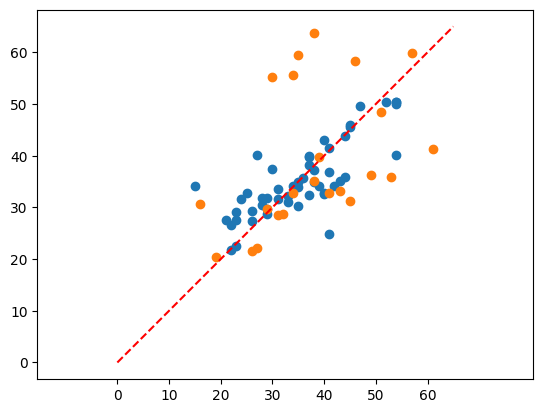

In [53]:
y_pred_train = best_model.predict(X_train)
plt.scatter(y_train, y_pred_train)
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, 65), np.linspace(0, 65), color='red', linestyle='--')
plt.xticks(np.arange(0, 70, 10))
plt.yticks(np.arange(0, 70, 10))
plt.axis('equal')
plt.show()

## Let's try with mental health score

In [54]:
y=df['mental_health_score']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
k_fold = KFold(n_splits=10)

parameters = {'n_estimators': [10, 20, 30 ,40, 50], 'max_depth': [3, 5, 8, 10], 'criterion' : ['squared_error'] }

grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid = parameters, cv=k_fold, verbose =10, scoring='explained_variance')

grid.fit(X_train, y_train)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START criterion=squared_error, max_depth=3, n_estimators=10.....
[CV 1/10; 1/20] END criterion=squared_error, max_depth=3, n_estimators=10;, score=0.192 total time=   0.0s
[CV 2/10; 1/20] START criterion=squared_error, max_depth=3, n_estimators=10.....
[CV 2/10; 1/20] END criterion=squared_error, max_depth=3, n_estimators=10;, score=0.025 total time=   0.0s
[CV 3/10; 1/20] START criterion=squared_error, max_depth=3, n_estimators=10.....
[CV 3/10; 1/20] END criterion=squared_error, max_depth=3, n_estimators=10;, score=-0.141 total time=   0.0s
[CV 4/10; 1/20] START criterion=squared_error, max_depth=3, n_estimators=10.....
[CV 4/10; 1/20] END criterion=squared_error, max_depth=3, n_estimators=10;, score=-0.077 total time=   0.0s
[CV 5/10; 1/20] START criterion=squared_error, max_depth=3, n_estimators=10.....
[CV 5/10; 1/20] END criterion=squared_error, max_depth=3, n_estimators=10;, score=-0.124 total time=  

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='explained_variance', verbose=10)

In [57]:
best_model = grid.best_estimator_

In [58]:
best_model

RandomForestRegressor(max_depth=3, n_estimators=10)

In [59]:

# test the model
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')


MSE: 167.4864051926875, MAE: 10.921070540124177, R2: -0.2817960757346678


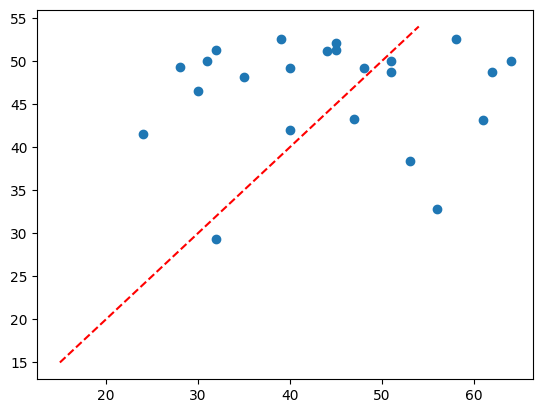

In [60]:
plt.scatter(y_test, y_pred)
# plot the line of best fit
plt.plot(np.arange(15, 55), np.arange(15, 55), color='red', linestyle='--')

# MLP

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import KFold

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, Callback
from keras.regularizers import L1, L2
from keras.initializers import RandomUniform, GlorotUniform, GlorotNormal, Initializer

In [62]:
from keras.losses import MAE

In [63]:
X_train

array([[0.        , 0.31707317, 0.55793991, ..., 0.93919365, 0.93545611,
        0.84894895],
       [0.        , 0.24390244, 0.46480687, ..., 0.21943159, 0.12076879,
        0.88018018],
       [0.        , 0.80487805, 0.35493562, ..., 0.36946464, 0.29575445,
        0.63693694],
       ...,
       [0.        , 0.53658537, 0.63304721, ..., 0.9193655 , 0.92398164,
        0.73603604],
       [1.        , 0.68292683, 0.6888412 , ..., 0.51454065, 0.49569707,
        0.63603604],
       [0.        , 0.80487805, 0.43948498, ..., 1.        , 1.        ,
        0.73333333]])

In [64]:
y_train=np.array(y_train)

In [65]:
y_train

array([57., 35., 51., 17., 63., 60., 36., 61., 41., 56., 49., 43., 61.,
       52., 36., 31., 63., 40., 44., 50., 56., 36., 27., 55., 50., 31.,
       51., 49., 37., 51., 62., 52., 55., 61., 25., 50., 66., 56., 46.,
       60., 35., 62., 40., 59., 59., 29., 49., 28., 29., 39., 36., 42.])

In [ ]:
# Define the number of folds
n_splits = len(X_train)

# Initialize StratifiedKFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate through the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Training on fold {fold + 1}...")
    
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = Sequential()
    
    model.add(
        Dense(
            units=32, 
            input_dim=X_train.shape[1], 
            activation='relu', 
            kernel_regularizer=L2(1e-6)
        )
    )
    model.add(
        Dense(
            units=32,
            activation='relu', 
            kernel_regularizer=L2(1e-6)
        )
    )

    model.add(
        Dense(
            units=32,
            activation='relu', 
            kernel_regularizer=L2(1e-6)
        )
    )
    model.add(
        Dense(
            units=1,
            activation='linear'
        )

    )
    
    # Compile and train the model on the current fold
    model.compile(
        optimizer=SGD(learning_rate=1e-5, momentum=0.9, nesterov=True), 
        loss='MSE', 
        metrics=['MAE']
    )
    
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        min_delta=1e-4,
        patience=5, 
        restore_best_weights=True 
    )
    
    history = model.fit(
        X_train_fold, 
        y_train_fold, 
        epochs=50, 
        batch_size=1, 
        validation_data=(X_val_fold, y_val_fold), 
        callbacks=[early_stopping]
    )


In [ ]:
history.history.keys()

dict_keys(['loss', 'MAE', 'val_loss', 'val_MAE'])

In [ ]:
MAE_keras_mean = np.mean(MAE_keras_list)
val_MAE_keras_mean = np.mean(val_MAE_keras_list)



In [ ]:
# Keep in a list MEE_keras and val_MEE_keras values for each fold
MAE_keras_list = []
val_MAE_keras_list = []

MAE_keras_list.append(history.history['MAE'])
val_MAE_keras_list.append(history.history['val_MAE'])

MAE_keras_mean = np.mean(MAE_keras_list)
val_MAE_keras_mean = np.mean(val_MAE_keras_list)

print(f'Mean MAE_keras over the 51 folds: {MAE_keras_mean:.4f}')
print(f'Mean val_MAE_keras over the 51 folds: {val_MAE_keras_mean:.4f}')


Mean MAE_keras over the 5 folds: 6.8698
Mean val_MAE_keras over the 5 folds: 13.3352


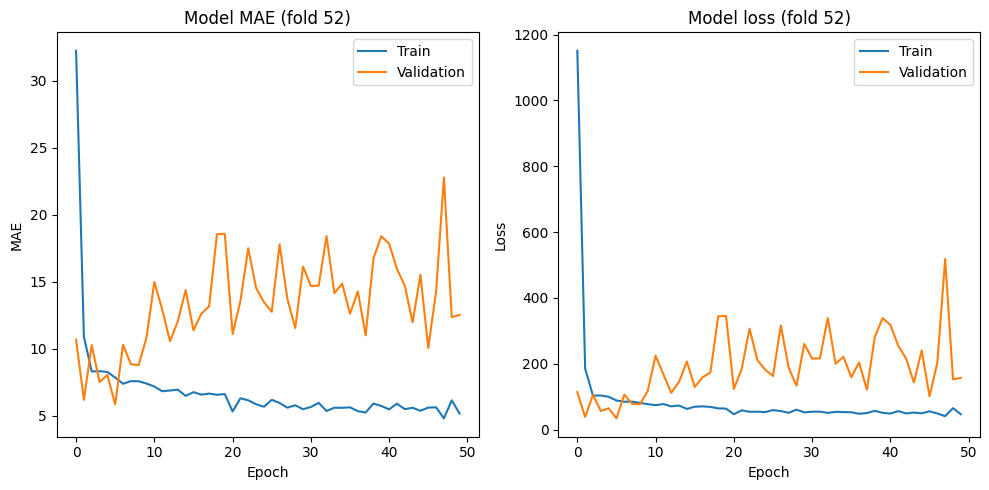

In [ ]:

# plot training and validation mee values
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.title('Model MAE (fold {})'.format(fold + 1))
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss (fold {})'.format(fold + 1))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

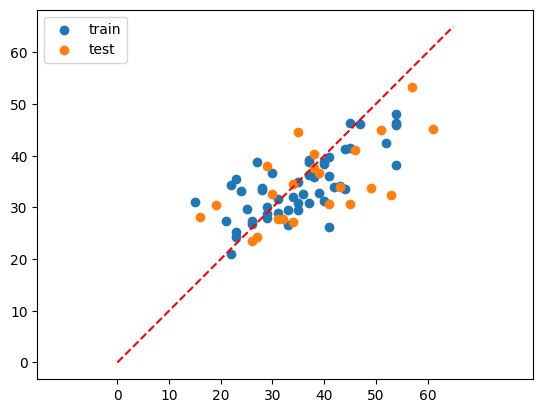

In [ ]:
y_pred_train = model(X_train)
y_pred=model(X_test)
plt.scatter(y_train, y_pred_train,label='train')
plt.scatter(y_test, y_pred,label='test')
plt.plot(np.linspace(0, 65), np.linspace(0, 65), color='red', linestyle='--')
plt.xticks(np.arange(0, 70, 10))
plt.yticks(np.arange(0, 70, 10))
plt.axis('equal')
plt.legend()
plt.show()


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 84.25723420124822, MAE: 7.400013550468113, R2: 0.3394968007400446


In [ ]:
model = Sequential()

model.add(
    Dense(
        units=32, 
        input_dim=X_train.shape[1], 
        activation='relu', 
        kernel_regularizer=L2(1e-6)
    )
)
model.add(
    Dense(
        units=32,
        activation='relu', 
        kernel_regularizer=L2(1e-6)
    )
)

model.add(
    Dense(
        units=32,
        activation='relu', 
        kernel_regularizer=L2(1e-6)
    )
)
model.add(
    Dense(
        units=1,
        activation='linear'
    )

)

In [ ]:
#Compile and train the model on the current fold
model.compile(
    optimizer=SGD(learning_rate=1e-4, momentum=0.9, nesterov=True), 
    loss='MSE', 
    metrics=[MEE_keras]
)

history = model.fit(
    X_train, 
    y_train, 
    epochs=989, 
    batch_size=1,
    validation_data=(X_test, y_test)
)


In [ ]:

history = history.history

"""
plot training and validation mee values
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history['MEE_keras'])
plt.plot(history['val_MEE_keras'], linestyle='--')
plt.title('Model MEE')
plt.ylabel('MEE')
plt.xlabel('# Epochs')
plt.legend(['Training', 'Test'], loc='upper right')
"""

#plot training and validation loss values
#plt.subplot(1, 2, 2)
plt.ylim(0, 8)
plt.plot(history['loss'])
plt.plot(history['val_loss'], linestyle='--')
plt.title('Learning curve of final model in Keras')
plt.ylabel('Loss')
plt.xlabel('# Epochs')
plt.legend(['Training', 'Test'], loc='upper right')

plt.tight_layout()
plt.savefig('../plots/final_model_keras.png', dpi=300, bbox_inches='tight')
plt.show()

#Evaluate the model on the test set
loss, MEE_keras = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test MEE: {MEE_keras:.4f}')

In [ ]:
model.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_254 (Dense)           (None, 32)                960       
                                                                 
 dense_255 (Dense)           (None, 32)                1056      
                                                                 
 dense_256 (Dense)           (None, 32)                1056      
                                                                 
 dense_257 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3105 (12.13 KB)
Trainable params: 3105 (12.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# More Analysis & SHAP

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import KFold

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, Callback
from keras.regularizers import L1, L2
from keras.initializers import RandomUniform, GlorotUniform, GlorotNormal, Initializer

In [16]:
df = pd.read_csv('../datasets/df_with_scores.csv')
df_counts=pd.read_csv('../datasets/pdb_files_ss_count.csv')

In [17]:
df_counts

,mutation,pdb_file,secondary_structure,B,H,T,E,S,-,I,P,G
0,G309V,../datasets/ALPHAFOLD PDBs/G309V_e3b31/G309V_e...,-----EEE-SS--EEEE-TTSTT-SPSS-SS-SS-GGGPEEEEEES...,9,2,24,28,35,58,1,9,7
1,G185R,../datasets/ALPHAFOLD PDBs/G185R_e6971/G185R_e...,--PPPEEE-SS--EEEE-TTSTT-SPSS-SS-SS-GGGPEEEEEES...,9,2,25,28,35,58,1,11,7
2,E168L,../datasets/ALPHAFOLD PDBs/E168L_0f4af/E168L_0...,-----EEE-SS--EEEE-TTSTT-SPSS-SS-SS-GGGPEEEEEES...,9,2,23,28,35,59,1,10,6
3,R225H,../datasets/ALPHAFOLD PDBs/R225H_3ba56/R225H_3...,--PPPEEE-SS--EEEE-TTSTT-SPSS-SS-SS-GGGPEEEEEES...,9,2,25,28,33,58,1,10,6
4,R53Q,../datasets/ALPHAFOLD PDBs/R53Q_8ee59/R53Q_8ee...,-----EEE-SS--EEEE-TTSTT-SPSS-SS-SS-GGGPEEEEEES...,9,2,24,28,35,59,1,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...
59,G270R,../datasets/ALPHAFOLD PDBs/G270R_3f501/G270R_3...,--PPPEEE-SS--EEEE-TTSTT-SPSS-SS-SS-GGGPEEEEEES...,9,2,25,28,37,59,1,11,6
60,G123A,../datasets/ALPHAFOLD PDBs/G123A_a58f9/G123A_a...,--PPPEEE-SS--EEEE-TTSTT-SPSS-SS-SS-GGGPEEEEEES...,9,2,26,28,36,59,1,11,6
61,G115Mfs*,../datasets/ALPHAFOLD PDBs/G115Mfs__4df58/G115...,---------TTS------TTSTT-SPSS-S--SS-GGGPEEEEEES...,0,0,9,4,12,18,0,4,2
62,His371Profs,../datasets/ALPHAFOLD PDBs/H371fs_9b3dd/H371fs...,--PPPEEE-TT--EEEE-TTSTT-S-SS-SS-SS-GGG-EEEEEES...,4,0,18,24,32,51,0,8,7


In [18]:
df = df.join(df_counts.set_index('mutation'), on='Protein change allele 1 ', rsuffix='_1')

In [19]:
df = df.join(df_counts.set_index('mutation'), on='Protein change allele 2', rsuffix='_2')

In [20]:
df.columns

Index(['Protein change allele 1 ', 'Protein change allele 2',
       'structure_allele1', 'structure_allele2', 'pdb_file_allele1',
       'pdb_file_allele2', 'patient', 'sex', 'birth', 'bmi',
       'physical_health_score', 'mental_health_score', 'AKUSSI_jointpain',
       'AKUSSI_spinalpain', 'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living',
       'KOOSsport', 'KOOS_QOL', 'HAQ_hapVAS', 'HAQ_haqDI', 'RMSD_A1',
       'RMSD_all_A1', 'Alignment_A1', 'RMSD_A2', 'RMSD_all_A2', 'Alignment_A2',
       'pdb_file', 'secondary_structure', 'B', 'H', 'T', 'E', 'S', '-', 'I',
       'P', 'G', 'pdb_file_2', 'secondary_structure_2', 'B_2', 'H_2', 'T_2',
       'E_2', 'S_2', '-_2', 'I_2', 'P_2', 'G_2'],
      dtype='object')

In [21]:
metrics = ['physical_health_score', 
           'mental_health_score', 
           'AKUSSI_jointpain', 
           'AKUSSI_spinalpain', 
           'KOOSpain', 
           'KOOSsymptoms', 
           'KOOSdaily_living', 
           'KOOSsport', 
           'KOOS_QOL', 
           'HAQ_hapVAS', 
           'HAQ_haqDI']

other_info =['Protein change allele 1 ', 
             'Protein change allele 2',
             'structure_allele1', 
             'structure_allele2', 
             'pdb_file_allele1',
             'pdb_file_allele2', 
             'patient']

X = df.drop(columns = metrics)
X = X.drop(columns = other_info)
X = X.drop(columns = ['secondary_structure', 'secondary_structure_2', 'pdb_file', 'pdb_file_2'])
X['sex'].replace({'M': -1, 'F': 1}, inplace=True)   

In [22]:
X.columns

Index(['sex', 'birth', 'bmi', 'RMSD_A1', 'RMSD_all_A1', 'Alignment_A1',
       'RMSD_A2', 'RMSD_all_A2', 'Alignment_A2', 'B', 'H', 'T', 'E', 'S', '-',
       'I', 'P', 'G', 'B_2', 'H_2', 'T_2', 'E_2', 'S_2', '-_2', 'I_2', 'P_2',
       'G_2'],
      dtype='object')

In [12]:
"""X = df.drop(columns = labels_cols)
X = X.drop(columns = ['structure_allele1', 
                      'structure_allele2', 
                      'pdb_file_allele1', 
                      'pdb_file_allele2', 
                      'patient',
                      'Protein Variant',
                      'Protein Variant_2'
                      ])"""

"X = df.drop(columns = labels_cols)\nX = X.drop(columns = ['structure_allele1', \n                      'structure_allele2', \n                      'pdb_file_allele1', \n                      'pdb_file_allele2', \n                      'patient',\n                      'Protein Variant',\n                      'Protein Variant_2'\n                      ])"

## Physical Health Score

In [79]:
y = df['physical_health_score']

In [80]:
y = np.array(y)

In [81]:
y.shape

(103,)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
X_test.head(2)

,sex,birth,bmi,RMSD_A1,RMSD_all_A1,Alignment_A1,RMSD_A2,RMSD_all_A2,Alignment_A2,B,...,G,B_2,H_2,T_2,E_2,S_2,-_2,I_2,P_2,G_2
30,1,1956.0,29.09,0.559,1.004,2321.4,0.648,0.853,1890.4,9,...,6,4,0,18,24,32,51,0,8,7
67,-1,1952.0,26.24,0.550,0.712,2315.2,0.794,24.713,303.2,9,...,8,0,0,6,2,15,21,0,4,2


### Neural Network

In [85]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [86]:
# Define the number of folds
n_splits = 5

# Initialize StratifiedKFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
history_dict = {}
# Iterate through the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Training on fold {fold + 1}...")
    
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = Sequential()
    
    model.add(
        Dense(
            units=1000, 
            input_dim=X_train.shape[1], 
            activation='relu', 
            kernel_regularizer=L1(1e-5)
        )
    )

    model.add(
        Dense(
            units=500, 
            activation='relu', 
            kernel_regularizer=L1(1e-5)
        )
    )
    
    model.add(
        Dense(
            units=1,
            activation='linear'
        )

    )
    
    # Compile and train the model on the current fold
    model.compile(
        optimizer=SGD(learning_rate=1e-5, momentum=0.9, nesterov=True), 
        loss='MSE', 
        metrics=['MAE']
    )
    
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        min_delta=0,
        patience=10, 
        restore_best_weights=True 
    )
    
    history = model.fit(
        X_train_fold, 
        y_train_fold, 
        epochs=50, 
        batch_size=1, 
        validation_data=(X_val_fold, y_val_fold), 
        callbacks=[early_stopping]
    )
    history_dict[fold] = history


Training on fold 1...
Epoch 1/50


/Users/irene/VSCodeProjects/CHL-Project/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 32.9372 - loss: 1220.1354 - val_MAE: 10.8493 - val_loss: 175.5995
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 10.8850 - loss: 216.5576 - val_MAE: 9.0245 - val_loss: 146.2259
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 8.6741 - loss: 131.8618 - val_MAE: 8.9736 - val_loss: 137.9126
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 9.5005 - loss: 150.8367 - val_MAE: 8.6656 - val_loss: 134.2212
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 9.4701 - loss: 137.1000 - val_MAE: 8.7418 - val_loss: 131.2744
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 8.8839 - loss: 128.5370 - val_MAE: 9.4213 - val_loss: 140.8610
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 8.2071 - loss: 142.7516 - val_MAE: 8.6051 - val_loss: 136.1451
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 8.6383 - loss: 102.1224 - val_MAE: 8.5091 - val_loss: 134.1844
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

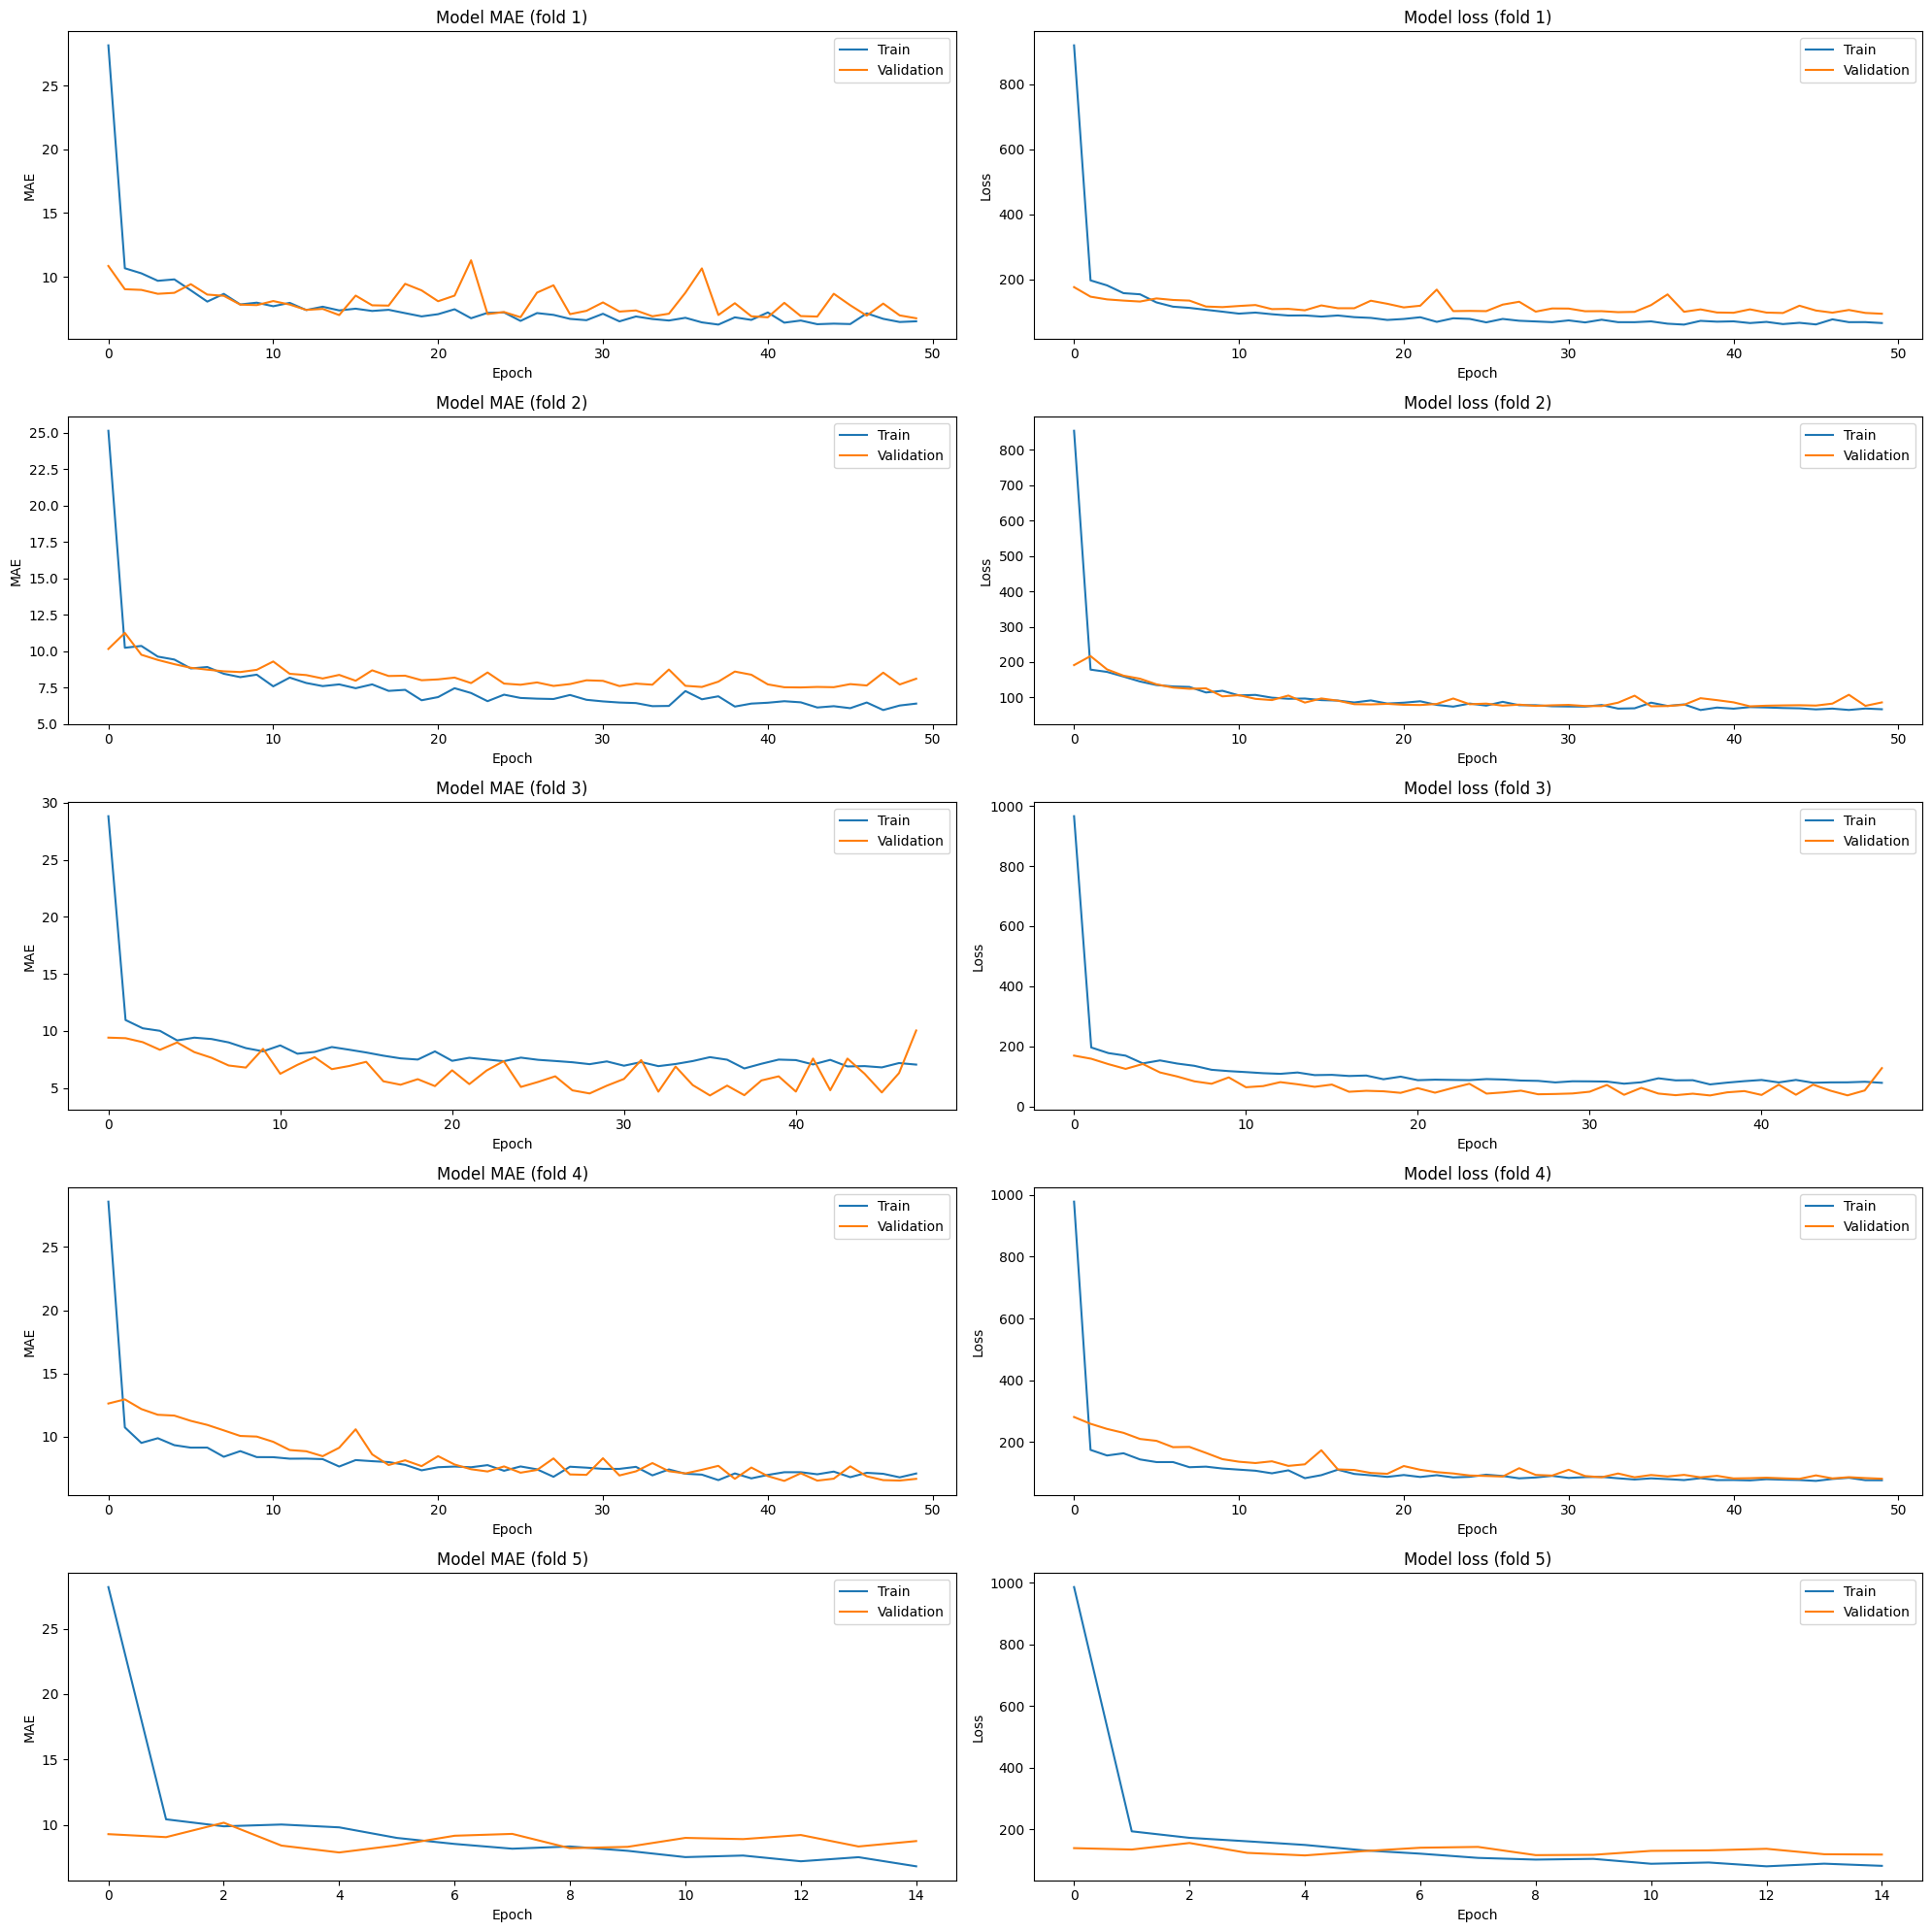

In [87]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

for i in range(5):
    history = history_dict[i]
    axs[i, 0].plot(history.history['MAE'])
    axs[i, 0].plot(history.history['val_MAE'])
    axs[i, 0].set_title('Model MAE (fold {})'.format(i + 1))
    axs[i, 0].set_ylabel('MAE')
    axs[i, 0].set_xlabel('Epoch')
    axs[i, 0].legend(['Train', 'Validation'], loc='upper right')

    axs[i, 1].plot(history.history['loss'])
    axs[i, 1].plot(history.history['val_loss'])
    axs[i, 1].set_title('Model loss (fold {})'.format(i + 1))
    axs[i, 1].set_ylabel('Loss')
    axs[i, 1].set_xlabel('Epoch')
    axs[i, 1].legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [88]:
# reset model weights and train on tr set
model = Sequential()
    
model.add(
    Dense(
        units=1000, 
        input_dim=X_train.shape[1], 
        activation='relu', 
        kernel_regularizer=L1(1e-5)
    )
)

model.add(
    Dense(
        units=500,  
        activation='relu', 
        kernel_regularizer=L1(1e-5)
    )
)

model.add(
    Dense(
        units=1,
        activation='linear'
    )

)

# Compile and train the model on the current fold
model.compile(
    optimizer=SGD(learning_rate=1e-5, momentum=0.9, nesterov=True), 
    loss='MSE', 
    metrics=['MAE']
)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0,
    patience=10, 
    restore_best_weights=True 
)

history = model.fit(
    X_train,
    y_train,
    epochs=50, 
    batch_size=1, 

    callbacks=[early_stopping]
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 33.1755 - loss: 1258.4691  
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 11.2855 - loss: 225.3559
Epoch 3/50
35/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 12.4324 - loss: 221.7457

/Users/irene/VSCodeProjects/CHL-Project/.venv/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: MAE,loss
  current = self.get_monitor_value(logs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 11.2867 - loss: 194.9850
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 9.0236 - loss: 144.0354
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 8.3256 - loss: 123.1104
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 7.9180 - loss: 119.6034
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 8.2707 - loss: 110.4421
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 7.6312 - loss: 100.3461
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 8.2573 - loss: 104.0723
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 7.3005 - loss: 86.7107
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 8.0099 - loss: 104.8759
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 7.5226 - loss: 87.1255
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 8.6671 - loss: 118.0885
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 7.4991 - loss: 82.6351
Epoch 15/50
72/72 ━━━━━━━━━━━━━━━━━━

In [89]:
# p
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# calculate the mean squared error and the mean absolute error
mse = MSE(y_test, y_pred)
mae = MAE(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 101.04438688534684, MAE: 8.143471071797032, R2: -0.04038888075961933


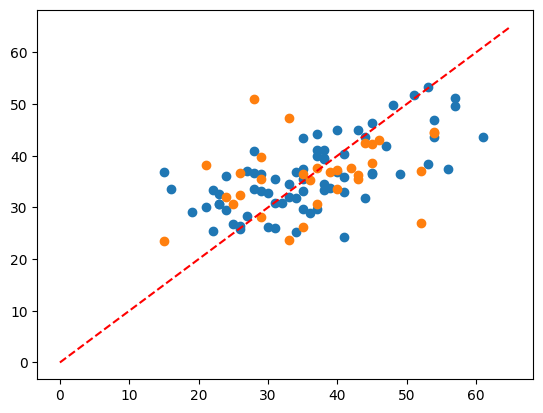

In [40]:
plt.scatter(y_train, y_pred_train)
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, 65), np.linspace(0, 65), color='red', linestyle='--')

In [ ]:
# save model
model.save('../models/physical_health_score_model.keras')

# save X_train, X_test, y_train, y_test

np.save('../datasets/X_train.npy', X_train)
np.save('../datasets/X_test.npy', X_test)
np.save('../datasets/y_train.npy', y_train)
np.save('../datasets/y_test.npy', y_test)


In [17]:
# load model
from keras.models import load_model
model = load_model('../models/physical_health_score_model.keras')

# load X_train, X_test, y_train, y_test
X_train = np.load('../datasets/X_train.npy')
X_test = np.load('../datasets/X_test.npy')
y_train = np.load('../datasets/y_train.npy')
y_test = np.load('../datasets/y_test.npy')

##### SHAP NN

In [56]:
import shap

In [ ]:
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

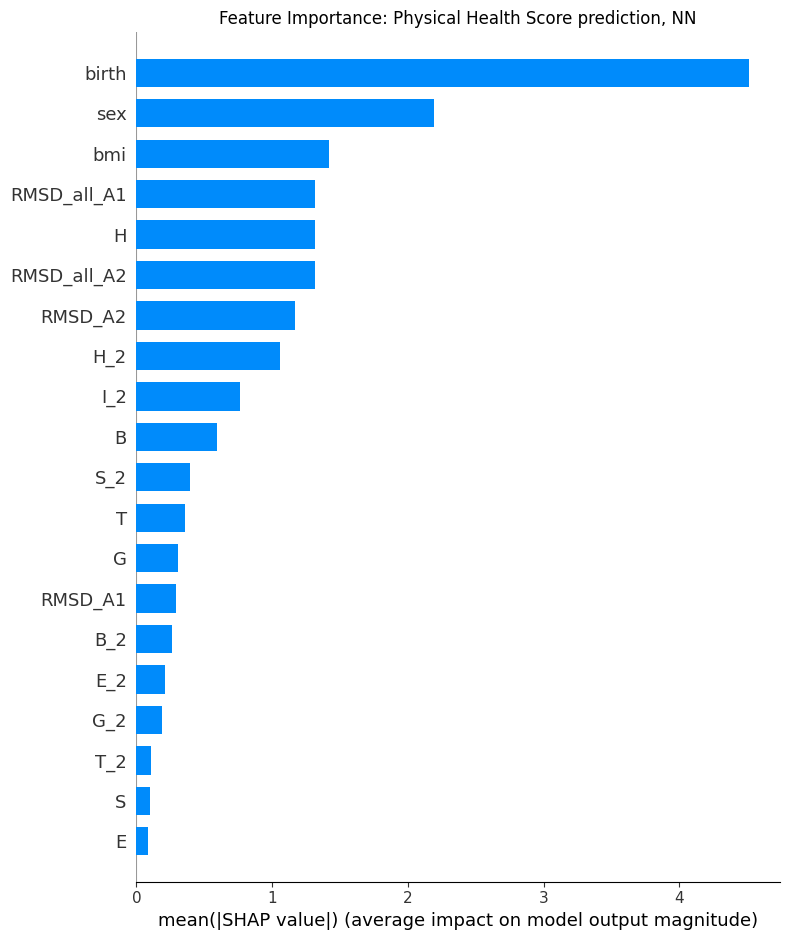

In [58]:
shap_values = shap_values.squeeze()

# plot with title
plt.title('Feature Importance: Physical Health Score prediction, NN')
shap.summary_plot(shap_values, X_test, feature_names = X.columns, plot_type='bar')
plt.show()

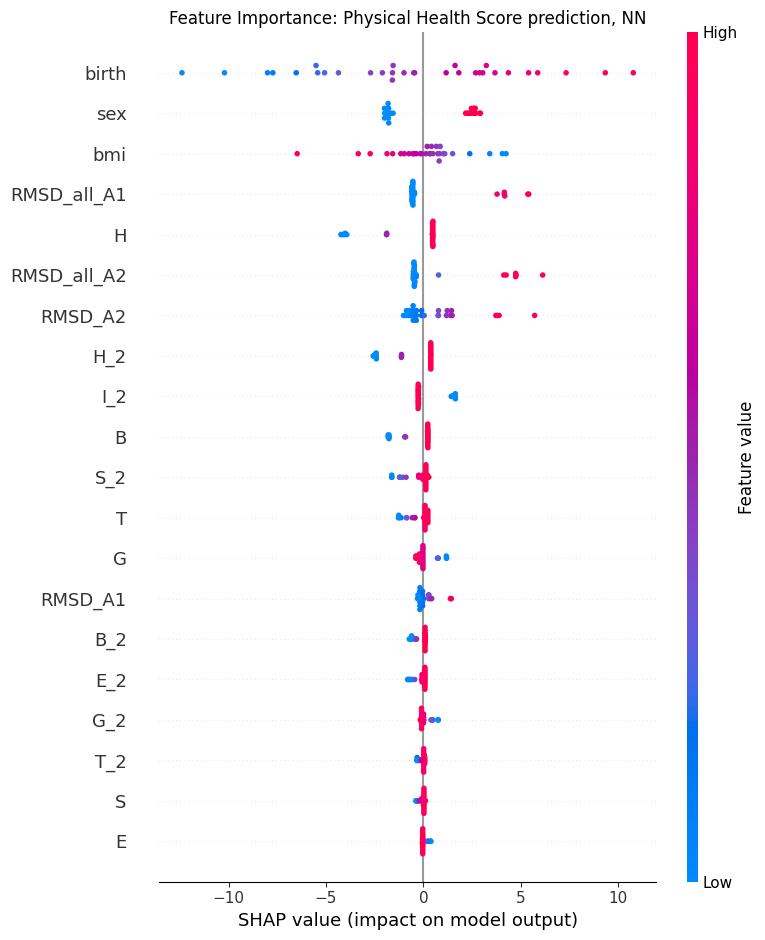

In [59]:
# BEESWARM PLOT
plt.title('Feature Importance: Physical Health Score prediction, NN')
shap.summary_plot(shap_values, X_test, feature_names = X.columns, plot_type='dot')
plt.show()

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=30, criterion='squared_error')
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

mse = MSE(y_test, y_pred_rf)
mae = MAE(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')


MSE: 83.59262258064517, MAE: 7.267419354838711, R2: 0.13930068035228316


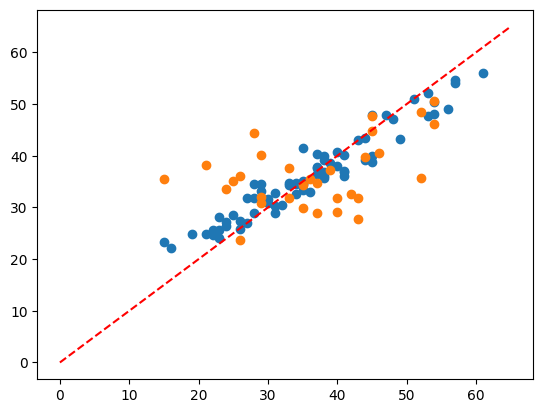

In [42]:
plt.scatter(y_train, y_pred_train_rf)
plt.scatter(y_test, y_pred_rf)
plt.plot(np.linspace(0, 65), np.linspace(0, 65), color='red', linestyle='--')

#### SHAP Random Forest

In [44]:
import shap 

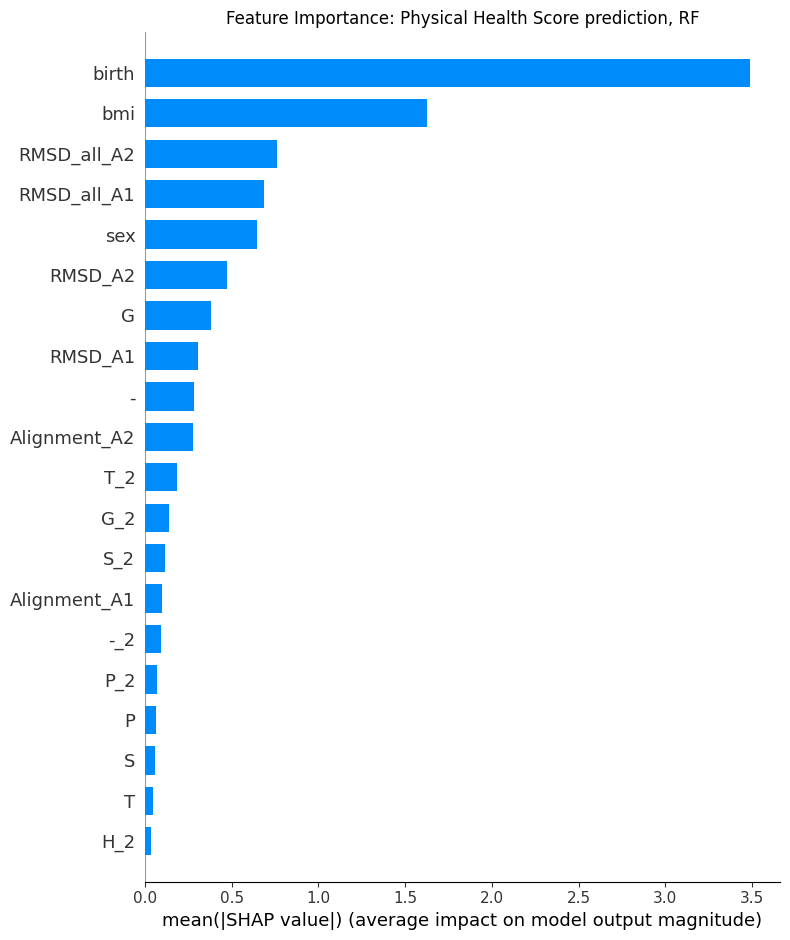

In [54]:
rf_explainer = shap.TreeExplainer(rf) 
shap_values_rf = rf_explainer.shap_values(X_test)

# plot with title
plt.title('Feature Importance: Physical Health Score prediction, RF')
shap.summary_plot(shap_values_rf, X_test, feature_names = X.columns, plot_type='bar')
plt.show()

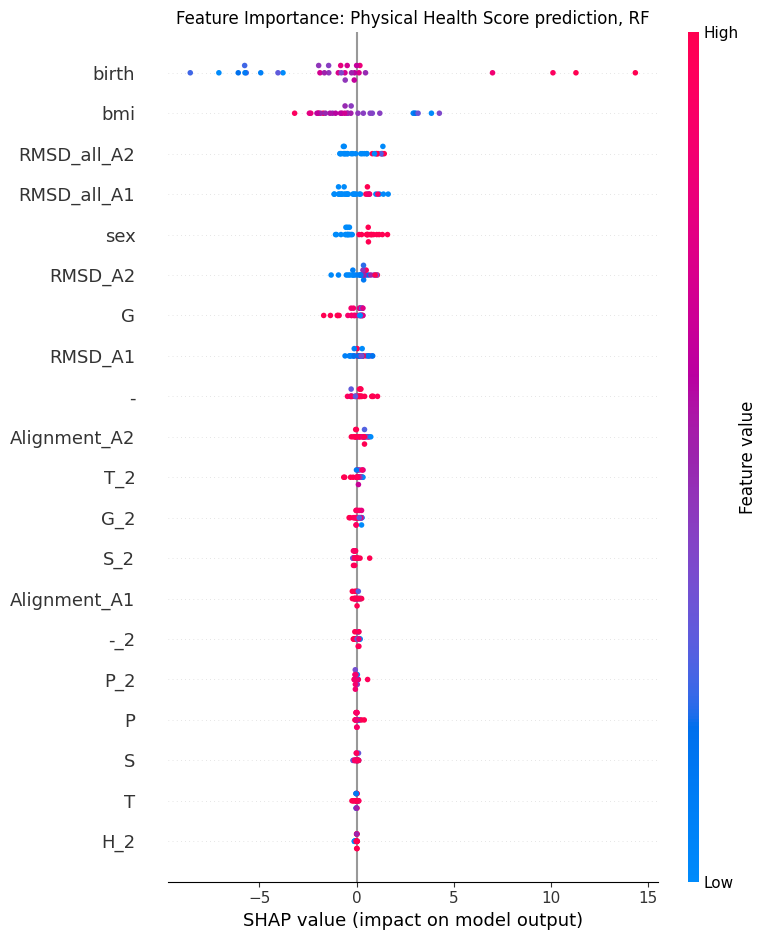

In [55]:
# BEESWARM PLOT
plt.title('Feature Importance: Physical Health Score prediction, RF')
shap.summary_plot(shap_values_rf, X_test, feature_names = X.columns, plot_type='dot')
plt.show()

## HAQ_hapVAS

In [130]:
y = df['HAQ_hapVAS']

In [131]:
y = np.array(y)

In [132]:
y.shape

(103,)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [134]:
X_test.head(2)

,sex,birth,bmi,RMSD_A1,RMSD_all_A1,Alignment_A1,RMSD_A2,RMSD_all_A2,Alignment_A2,B,...,G,B_2,H_2,T_2,E_2,S_2,-_2,I_2,P_2,G_2
30,1,1956.0,29.09,0.559,1.004,2321.4,0.648,0.853,1890.4,9,...,6,4,0,18,24,32,51,0,8,7
67,-1,1952.0,26.24,0.550,0.712,2315.2,0.794,24.713,303.2,9,...,8,0,0,6,2,15,21,0,4,2


### Neural Network

In [135]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [136]:
# Define the number of folds
n_splits = 5

# Initialize StratifiedKFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
history_dict = {}
# Iterate through the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Training on fold {fold + 1}...")
    
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = Sequential()
    
    model.add(
        Dense(
            units=1024, 
            input_dim=X_train.shape[1], 
            activation='relu', 
            kernel_regularizer=L1(1e-5)
        )
    )

    model.add(
        Dense(
            units=512, 
            activation='relu', 
            kernel_regularizer=L1(1e-5)
        )
    )

    model.add(
        Dense(
            units=256, 
            activation='relu', 
            kernel_regularizer=L1(1e-5)
        )
    )
    
    model.add(
        Dense(
            units=1,
            activation='linear'
        )

    )
    
    # Compile and train the model on the current fold
    model.compile(
        optimizer=SGD(learning_rate=1e-5, momentum=0.9, nesterov=True), 
        loss='MSE', 
        metrics=['MAE']
    )
    
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        min_delta=0,
        patience=10, 
        restore_best_weights=True 
    )
    
    history = model.fit(
        X_train_fold, 
        y_train_fold, 
        epochs=50, 
        batch_size=1, 
        validation_data=(X_val_fold, y_val_fold), 
        callbacks=[early_stopping]
    )
    history_dict[fold] = history


Training on fold 1...
Epoch 1/50


/Users/irene/VSCodeProjects/CHL-Project/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 47.1186 - loss: 2748.2483 - val_MAE: 20.6601 - val_loss: 668.4939
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 27.9456 - loss: 1098.0026 - val_MAE: 23.1602 - val_loss: 817.4413
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 18.4913 - loss: 587.0781 - val_MAE: 20.7443 - val_loss: 670.7787
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 25.1370 - loss: 817.1386 - val_MAE: 20.9439 - val_loss: 698.1659
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 23.6673 - loss: 757.5408 - val_MAE: 21.4363 - val_loss: 728.5438
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 21.7229 - loss: 708.5823 - val_MAE: 21.0896 - val_loss: 709.6169
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 24.9115 - loss: 830.7095 - val_MAE: 27.9848 - val_loss: 1123.3870
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 23.7382 - loss: 776.6456 - val_MAE: 20.9784 - val_loss: 682.3322
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━

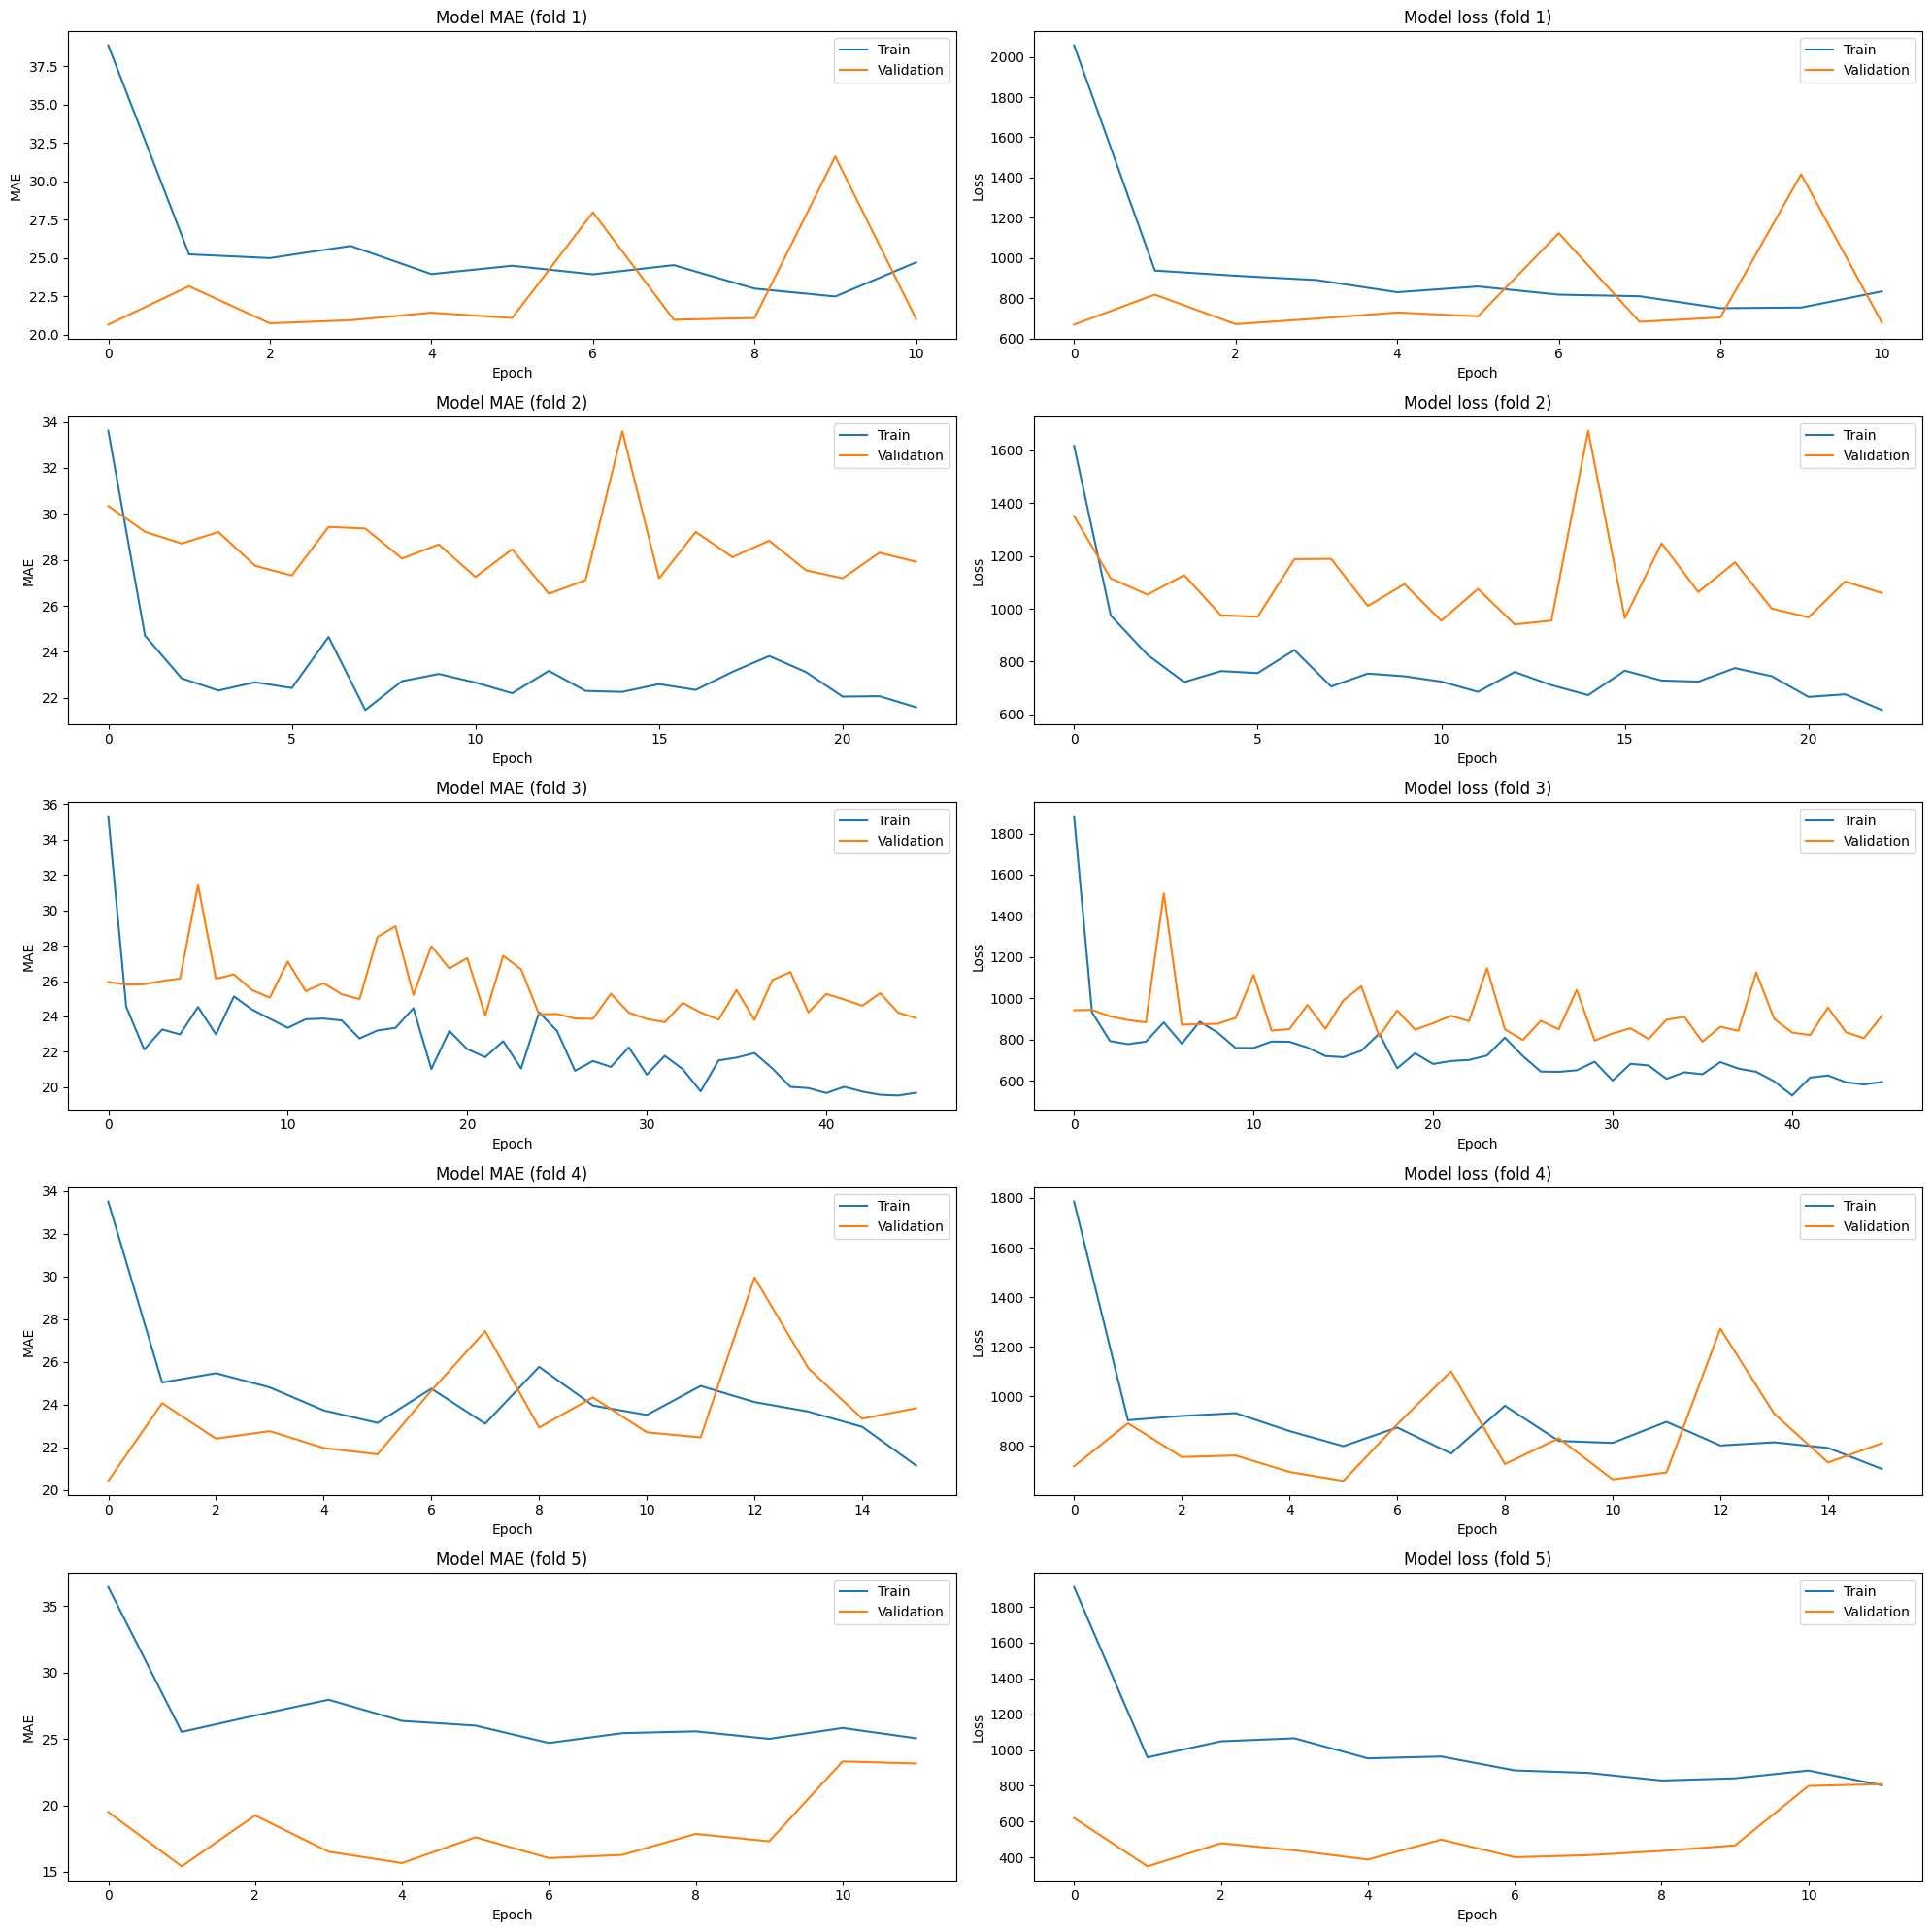

In [137]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

for i in range(5):
    history = history_dict[i]
    axs[i, 0].plot(history.history['MAE'])
    axs[i, 0].plot(history.history['val_MAE'])
    axs[i, 0].set_title('Model MAE (fold {})'.format(i + 1))
    axs[i, 0].set_ylabel('MAE')
    axs[i, 0].set_xlabel('Epoch')
    axs[i, 0].legend(['Train', 'Validation'], loc='upper right')

    axs[i, 1].plot(history.history['loss'])
    axs[i, 1].plot(history.history['val_loss'])
    axs[i, 1].set_title('Model loss (fold {})'.format(i + 1))
    axs[i, 1].set_ylabel('Loss')
    axs[i, 1].set_xlabel('Epoch')
    axs[i, 1].legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [138]:
# reset model weights and train on tr set
model = Sequential()
    
model.add(
    Dense(
        units=1024, 
        input_dim=X_train.shape[1], 
        activation='relu', 
        kernel_regularizer=L1(1e-5)
    )
)

model.add(
    Dense(
        units=512,  
        activation='relu', 
        kernel_regularizer=L1(1e-5)
    )
)

model.add(
    Dense(
        units=256,  
        activation='relu', 
        kernel_regularizer=L1(1e-5)
    )
)

model.add(
    Dense(
        units=1,
        activation='linear'
    )

)

# Compile and train the model on the current fold
model.compile(
    optimizer=SGD(learning_rate=1e-5, momentum=0.9, nesterov=True), 
    loss='MSE', 
    metrics=['MAE']
)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0,
    patience=10, 
    restore_best_weights=True 
)

history = model.fit(
    X_train,
    y_train,
    epochs=50, 
    batch_size=1, 

    callbacks=[early_stopping]
)


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 43.7520 - loss: 2525.0784 
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 25.9587 - loss: 906.6331
Epoch 3/50
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - MAE: 56.4615 - loss: 3188.1375

/Users/irene/VSCodeProjects/CHL-Project/.venv/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: MAE,loss
  current = self.get_monitor_value(logs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 25.0971 - loss: 938.8829
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 25.6514 - loss: 968.8792
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 22.6905 - loss: 741.9882
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 21.3151 - loss: 700.5558
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 22.3036 - loss: 755.9428
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 23.3541 - loss: 770.3149
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 23.9285 - loss: 807.1516
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 24.6407 - loss: 820.4782
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 25.3745 - loss: 857.9402
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 21.8663 - loss: 653.3188
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 23.0928 - loss: 736.7043
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 22.6199 - loss: 679.5513
Epoch 15/50
72/72 ━━━━

In [139]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# calculate the mean squared error and the mean absolute error
mse = MSE(y_test, y_pred)
mae = MAE(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MSE: 1185.4278987242901, MAE: 27.004716665514053, R2: -0.5617964704187779


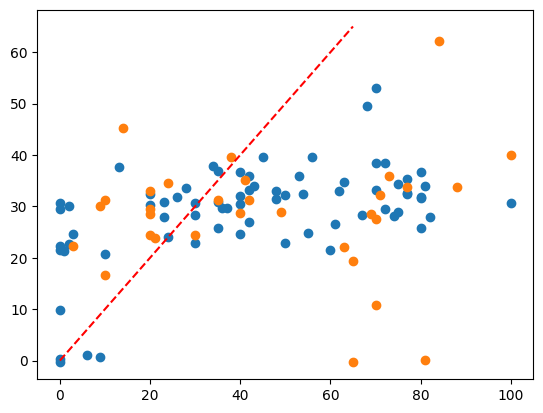

In [140]:
plt.scatter(y_train, y_pred_train)
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, 65), np.linspace(0, 65), color='red', linestyle='--')

In [ ]:
# save model
model.save('../models/physical_health_score_model.keras')

# save X_train, X_test, y_train, y_test

np.save('../datasets/X_train.npy', X_train)
np.save('../datasets/X_test.npy', X_test)
np.save('../datasets/y_train.npy', y_train)
np.save('../datasets/y_test.npy', y_test)


In [ ]:
# load model
from keras.models import load_model
model = load_model('../models/physical_health_score_model.keras')

# load X_train, X_test, y_train, y_test
X_train = np.load('../datasets/X_train.npy')
X_test = np.load('../datasets/X_test.npy')
y_train = np.load('../datasets/y_train.npy')
y_test = np.load('../datasets/y_test.npy')

##### SHAP NN

In [ ]:
import shap

In [ ]:
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

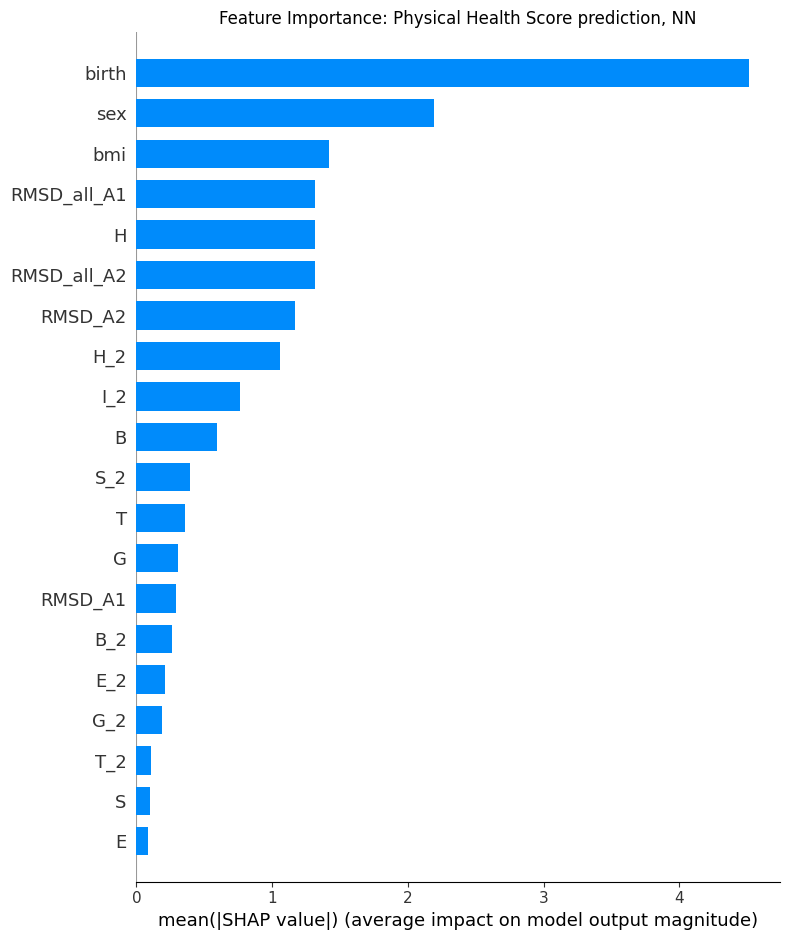

In [ ]:
shap_values = shap_values.squeeze()

# plot with title
plt.title('Feature Importance: Physical Health Score prediction, NN')
shap.summary_plot(shap_values, X_test, feature_names = X.columns, plot_type='bar')
plt.show()

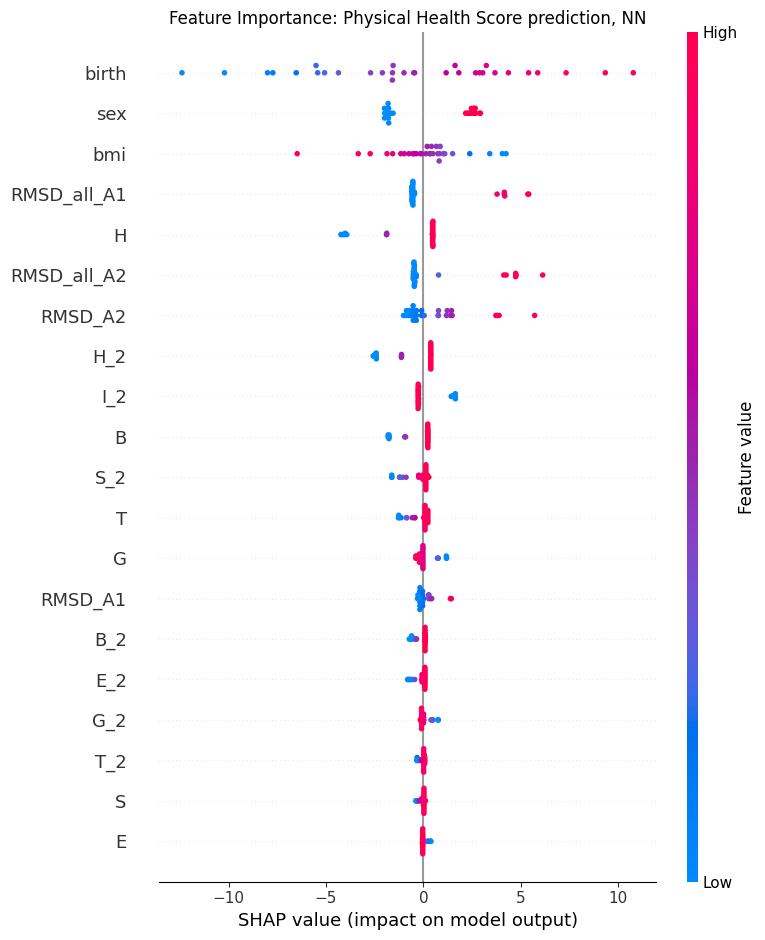

In [ ]:
# BEESWARM PLOT
plt.title('Feature Importance: Physical Health Score prediction, NN')
shap.summary_plot(shap_values, X_test, feature_names = X.columns, plot_type='dot')
plt.show()

### Random Forest

In [127]:
rf = RandomForestRegressor(n_estimators=400, max_depth=None, criterion='squared_error')
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

mse = MSE(y_test, y_pred_rf)
mae = MAE(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')


MSE: 494.38970262096774, MAE: 19.264274193548392, R2: 0.1803160251839987


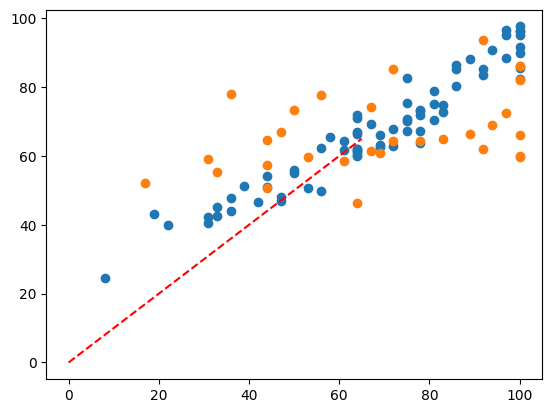

In [128]:
plt.scatter(y_train, y_pred_train_rf)
plt.scatter(y_test, y_pred_rf)
plt.plot(np.linspace(0, 65), np.linspace(0, 65), color='red', linestyle='--')

#### SHAP Random Forest

In [ ]:
import shap 

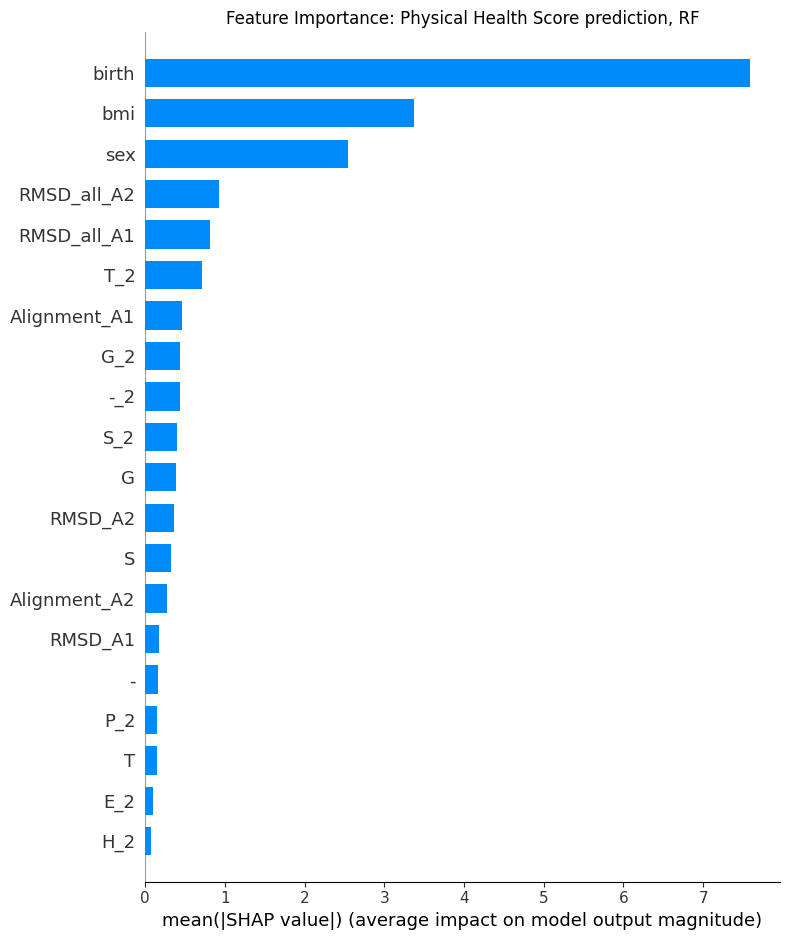

In [129]:
rf_explainer = shap.TreeExplainer(rf) 
shap_values_rf = rf_explainer.shap_values(X_test)

# plot with title
plt.title('Feature Importance: Physical Health Score prediction, RF')
shap.summary_plot(shap_values_rf, X_test, feature_names = X.columns, plot_type='bar')
plt.show()

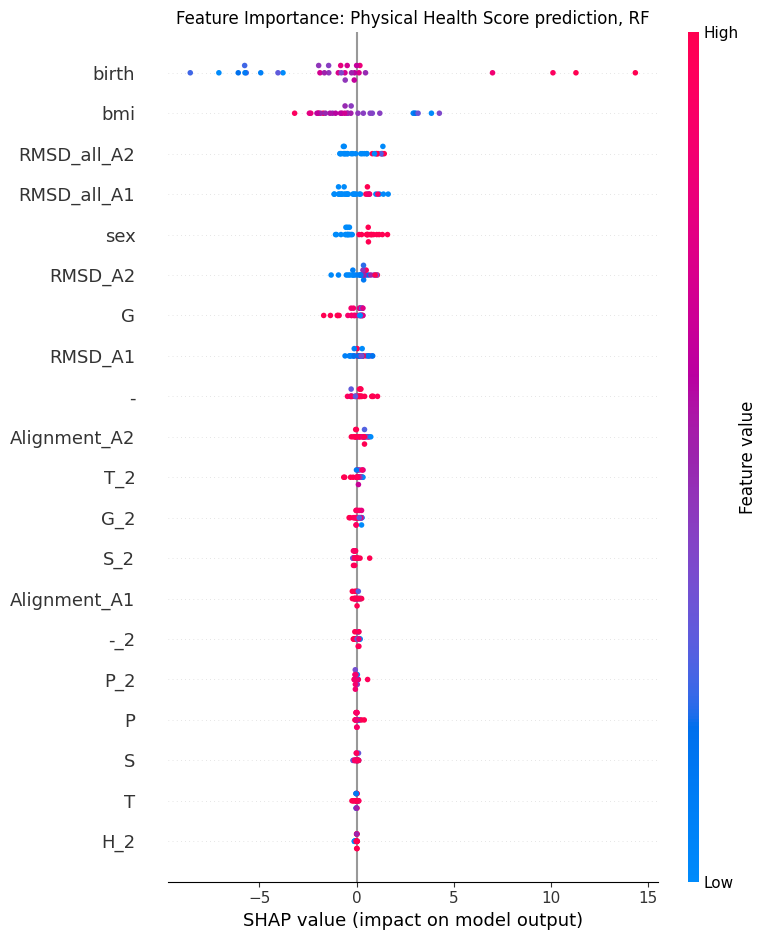

In [ ]:
# BEESWARM PLOT
plt.title('Feature Importance: Physical Health Score prediction, RF')
shap.summary_plot(shap_values_rf, X_test, feature_names = X.columns, plot_type='dot')
plt.show()